In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_frame=pd.read_csv(r"C:\Users\prasanna\Desktop\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 3 - Recurrent Neural Networks (RNN)\Google_Stock_Price_train.csv")

In [68]:
data_frame.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
#import the training set

training_set=data_frame.iloc[:,1:2].values

In [14]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [16]:
#feature scalling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [19]:
#creating the data structure with 60 timesteps and 1 output
#here model basically learn from every 60 days of the data

In [29]:
x_train=[]
y_train=[]

In [30]:
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i:i+1,0])

In [37]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [40]:
# Reshaping
# converted X_train from 2D to 3D 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1 ))

In [42]:
x_train.shape

(1198, 60, 1)

In [44]:

# Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers  import LSTM
from keras.layers import Dropout

In [50]:
# initialize the RNN
regressor =Sequential()

In [51]:
#Adding the first LSTM layer and droupout regularization 

In [52]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1 ) ))
#units are the no of neurons in the lstm layer
#return sequence is true if the lstm layer is not the last one else False
#input shape the last two values of the x_train dimensions
regressor.add(Dropout(0.2))
#Droupout will reduce the 20% of the neurons

In [53]:
#adding the second lstm layer with some dropout regularixzation
regressor.add(LSTM(units=50,return_sequences=True ))
regressor.add(Dropout(0.2))

In [54]:
#adding the third lstm layer with some dropout regularixzation
regressor.add(LSTM(units=50,return_sequences=True ))
regressor.add(Dropout(0.2))

In [55]:
#adding the fourth lstm layer with some dropout regularixzation
regressor.add(LSTM(units=50,return_sequences=False ))
regressor.add(Dropout(0.2))

In [56]:
#adding the output layer
regressor.add(Dense(units=1))

In [57]:
# compiling the RNN
regressor.compile(optimizer='RMSprop',loss='mean_squared_error')
#RMSprop is usually a good choice for the RNN

W1215 21:22:35.624056  6668 deprecation_wrapper.py:119] From C:\Users\prasanna\.conda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [59]:
#fitting the rnn to the training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

W1215 21:30:03.471419  6668 deprecation.py:323] From C:\Users\prasanna\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1215 21:30:05.907467  6668 deprecation_wrapper.py:119] From C:\Users\prasanna\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0392
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0170
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0137
Epoch 4/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0096
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0097
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0091
Epoch 7/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0081
Epoch 8/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0075
Epoch 9/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0068
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0062
Epoch 11/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0060
Epoch 12/100
1198/1198 [==============================] 

In [60]:
# making the prediction and visualising the result

In [61]:
#getting the real stock price of 2017
data_test=pd.read_csv(r"C:\Users\prasanna\Desktop\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 3 - Recurrent Neural Networks (RNN)\Google_Stock_Price_test.csv")

In [69]:
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [63]:
test_set=data_test.iloc[:,1:2].values

In [64]:
# getting the  predicted stock price of 2017
dataset_total=pd.concat((data_frame['Open'],data_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [65]:
x_test=[]

In [66]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
    

In [67]:
x_test=np.array(x_test)

In [70]:
# Reshaping
# converted X_test from 2D to 3D 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1 ))

In [71]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [72]:
predicted_stock_price

array([[767.02484],
       [764.8386 ],
       [768.3329 ],
       [769.9557 ],
       [773.5725 ],
       [779.7067 ],
       [782.64825],
       [781.4463 ],
       [781.0803 ],
       [781.6942 ],
       [782.3018 ],
       [782.1415 ],
       [781.7454 ],
       [782.41284],
       [783.1289 ],
       [789.4181 ],
       [795.3906 ],
       [799.86163],
       [799.2798 ],
       [790.5835 ]], dtype=float32)

In [73]:
#Visualizing gthe results

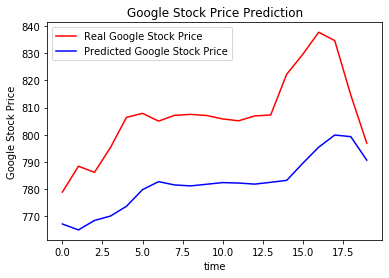

In [75]:
plt.plot(test_set,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
